# Exploring eBay Car Sales Data

I will be exploring the car sales data for [eBay car sales data](https://data.world/data-society/used-cars-data)

## 1. Load All Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

## 2. Read Data and Do Preliminary Exploration

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Here we see that the data contains 20 columns, most of which are strings. Also, most of the columns contain non-non value. However, some columns such as "notRepairedDamage" contain up to approximately 20% of null data.

Another interesting thing is that the columns are in camel case as opposed to Pythons snakecase, so we'll need to do something about it

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

## 3. Clean Column Names

Here, I am converting the column names from camel case to snake case so that it follows the convention of Python

In [4]:
def convert_to_snakecase(column_name):
    result = []
    character_array = [char for char in column_name]
    for character in character_array:
        if(character.isupper()):
            result.append("_")
            result.append(character.lower())
        else:
            result.append(character)
            
    return ''.join(result)

In [5]:
new_column_names = []
for column_name in autos.columns:
    new_column_names.append(convert_to_snakecase(column_name))

In [6]:
autos.columns = new_column_names

In [7]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_p_s,model,odometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## 4. Initial Exploration and Cleaning

### 4.1 Initial Exploration

#### 4.1.1 Numeric Data

Here we see that none of the records contain null values

In [8]:
autos.describe()

,year_of_registration,power_p_s,month_of_registration,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


#### 4.1.2 Categorical Data

There are a number of interesting observation from the "categorical" data shown below. First, some columns are considered "categorical" even though they are better when considered as "number". They include "price" and "odometer". Other that denote dates would also be better if converted to numeric data type. They include "date_crawled", "date_created", and "last_seen", 

In [9]:
autos.describe(exclude='number')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,gearbox,model,odometer,fuel_type,brand,not_repaired_damage,date_created,last_seen
count,50000,50000,50000,50000,50000,50000,44905,47320,47242,50000,45518,50000,40171,50000,50000
unique,48213,38754,2,2,2357,2,8,2,245,13,7,40,2,76,39481
top,2016-03-23 18:39:34,Ford_Fiesta,privat,Angebot,$0,test,limousine,manuell,golf,"150,000km",benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,36993,4024,32424,30107,10687,35232,1946,8


#### 4.1.3 Value Couts

Here we see that for some variables, the records are predominantly one value. One such case is the seller column where all records except one contain the value "private". Such columns will be removed

In [10]:
for column_name in autos.columns:
    print(column_name.upper())
    print(autos[column_name].value_counts())
    print("\n")

DATE_CRAWLED
2016-03-23 18:39:34    3
2016-03-29 23:42:13    3
2016-03-22 09:51:06    3
2016-03-19 17:36:18    3
2016-03-09 11:54:38    3
                      ..
2016-03-05 17:39:19    1
2016-03-16 14:52:28    1
2016-03-11 16:49:01    1
2016-03-07 16:52:51    1
2016-03-21 18:39:34    1
Name: date_crawled, Length: 48213, dtype: int64


NAME
Ford_Fiesta                                                          78
BMW_316i                                                             75
Volkswagen_Golf_1.4                                                  75
Volkswagen_Polo                                                      72
BMW_318i                                                             72
                                                                     ..
FORD_MONDEO_III_2001_TURNIER_2_0_TDDI_/_TDCI_16_V__GRÜNE_PLAKETE      1
Peugeot_206_1.6_Servo_Klima_Bj_2000_viele_Teile_Neu_Neue_Kupplung     1
Golf_3_Cabrio_VR6_Umbau                                               1
Renault_S

### 4.2 Cleaning

#### 4.2.1 Remove Columns with Predominantly One Value

In [11]:
autos = autos.drop(['seller', 'offer_type'], axis=1)

#### 4.2.1 Convert to Numeric and Give Appropriate Names

In [12]:
autos['price'] = (autos['price']
                      .str.replace('$', '')
                      .str.replace(',', '')
                 ).astype(float)


autos['odometer'] = (autos['odometer']
                         .str.replace('km', '')
                         .str.replace('s', '')
                         .str.replace(',', '')
                 ).astype(float)

In [13]:
autos.rename(columns={'odometer': 'odometer_km'}, inplace=True)

## 5. Explore Odometer and Price Columns

### 5.1 Explore Odometer

In [14]:
autos['odometer_km'].unique().shape

(13,)

In [15]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [16]:
autos['odometer_km'].value_counts()

150000.0    32424
125000.0     5170
100000.0     2169
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1027
5000.0        967
40000.0       819
30000.0       789
20000.0       784
10000.0       264
Name: odometer_km, dtype: int64

### 5.2 Explore Price

In [17]:
autos['price'].unique().shape

(2357,)

In [18]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [19]:
autos['price'].value_counts()

0.0        1421
500.0       781
1500.0      734
2500.0      643
1200.0      639
           ... 
6202.0        1
18310.0       1
898.0         1
11240.0       1
789.0         1
Name: price, Length: 2357, dtype: int64

### 5.3 Remove Outliers

Values 3 standard deviations from the mean have been considered outliers in this case

In [20]:
def remove_outlier(column_name, data=autos):
    mean_price = autos[column_name].describe()['mean']
    std_price = autos[column_name].describe()['std']
    x = mean_price - (3 * std_price)
    y = mean_price + (3 * std_price)
    
    return data[data[column_name].between(x, y)]

In [21]:
autos = remove_outlier(column_name='price', data=autos)
autos = remove_outlier(column_name='odometer_km', data=autos)

## 6. Explore Date Columns

I had mentioned previously that that the date columns were in string format as opposed to some numerical form that would aid in their analysis. It's time to deal with them now

There are five columns in our data that represet date values. These are;
- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `month_of_registration`: from the website
- `year_of_registration`: from the website

of the five columns, 'date_crawled', 'last_seen' and 'ad_created' are identified as string, while the rest are correctly identified as numerical data. As such, there is no need for extra processing for those ones

### 6.1 General Look

Here is how those date data look like

In [22]:
autos[['date_crawled','date_created','last_seen']][0:5]

,date_crawled,date_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


### 6.2 Distribution by Month and Year

In [23]:
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False)

2016-04-03    0.038674
2016-03-20    0.037879
2016-03-21    0.037654
2016-03-12    0.036981
2016-04-04    0.036532
2016-03-14    0.036512
2016-03-07    0.036022
2016-04-02    0.035431
2016-03-19    0.034880
2016-03-28    0.034635
2016-03-29    0.034166
2016-03-15    0.034064
2016-04-01    0.033983
2016-03-30    0.033636
2016-03-08    0.033432
2016-03-09    0.033248
2016-03-22    0.032779
2016-03-11    0.032534
2016-03-23    0.032473
2016-03-26    0.032432
2016-03-10    0.032126
2016-03-31    0.031861
2016-03-25    0.031841
2016-03-17    0.031351
2016-03-27    0.030964
2016-03-16    0.029271
2016-03-24    0.028985
2016-03-05    0.025395
2016-03-13    0.015502
2016-03-06    0.014013
2016-04-05    0.013177
2016-03-18    0.012973
2016-04-06    0.003162
2016-04-07    0.001428
Name: date_crawled, dtype: float64

In [24]:
autos['date_created'].str[:10].value_counts(normalize=True, dropna=False)

2016-04-03    0.038899
2016-03-20    0.037919
2016-03-21    0.037817
2016-04-04    0.036920
2016-03-12    0.036798
                ...   
2016-02-16    0.000020
2016-01-29    0.000020
2016-01-07    0.000020
2016-01-14    0.000020
2016-02-01    0.000020
Name: date_created, Length: 76, dtype: float64

In [25]:
autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False)

2016-04-06    0.220928
2016-04-07    0.131117
2016-04-05    0.124182
2016-03-17    0.028047
2016-04-03    0.025375
2016-04-02    0.024906
2016-03-30    0.024906
2016-04-04    0.024477
2016-03-31    0.023825
2016-03-12    0.023539
2016-04-01    0.023213
2016-03-29    0.022356
2016-03-22    0.021683
2016-03-20    0.020847
2016-03-21    0.020765
2016-03-28    0.020683
2016-03-24    0.019643
2016-03-25    0.019215
2016-03-23    0.018623
2016-03-26    0.016808
2016-03-16    0.016379
2016-03-27    0.015971
2016-03-15    0.015829
2016-03-19    0.015727
2016-03-14    0.012871
2016-03-11    0.012585
2016-03-10    0.010770
2016-03-09    0.009873
2016-03-13    0.008955
2016-03-08    0.007588
2016-03-18    0.007466
2016-03-07    0.005365
2016-03-06    0.004447
2016-03-05    0.001040
Name: last_seen, dtype: float64

An interesting finding we see here is that some cars were registered in the year 9000

In [26]:
autos.sort_values('year_of_registration')['year_of_registration'].unique()

array([1910, 1931, 1934, 1937, 1941, 1943, 1948, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       5911, 6200, 8888, 9000, 9996, 9999])

One car was registered in this odd year

In [27]:
autos[autos['year_of_registration']==9000].shape

(2, 18)

We can thus remove this record before we proceed with our analysis

In [28]:
autos = autos[autos['year_of_registration']!=9000]

In [29]:
autos['year_of_registration'].value_counts(normalize=True, dropna=False)

2000    0.066234
2005    0.060523
1999    0.060461
2004    0.055341
2003    0.055301
          ...   
6200    0.000020
1934    0.000020
1943    0.000020
5911    0.000020
1952    0.000020
Name: year_of_registration, Length: 82, dtype: float64

## 7 Exploring Price and Mileage by Brand

I'll be picking the top 20 biggest brand by popularity. I'll calculate popularity based on how many times a brand occurs in the dataset

### 7.1 Get Top 20 Brands

In [30]:
top_20_auto_brands = list(autos['brand']
                          .value_counts()
                          [:20]
                          .index)
print(top_20_auto_brands)

['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi', 'ford', 'renault', 'peugeot', 'fiat', 'seat', 'skoda', 'mazda', 'nissan', 'smart', 'citroen', 'toyota', 'hyundai', 'sonstige_autos', 'volvo', 'mini']


### 7.2 Aggregate Price

In [31]:
mean_price = {}
for brand in top_20_auto_brands:
    mean_price[brand] = round(autos
                             .loc[autos['brand'] == brand, 'price']
                             .mean(), 2)

print(mean_price)

{'volkswagen': 5373.59, 'opel': 2829.89, 'bmw': 8253.86, 'mercedes_benz': 8379.87, 'audi': 8929.86, 'ford': 3862.74, 'renault': 2319.72, 'peugeot': 3014.55, 'fiat': 2663.41, 'seat': 4193.57, 'skoda': 6283.81, 'mazda': 3933.97, 'nissan': 4611.06, 'smart': 3499.55, 'citroen': 3647.35, 'toyota': 5091.21, 'hyundai': 5290.86, 'sonstige_autos': 13533.95, 'volvo': 4708.0, 'mini': 10380.92}


Here we see no relationship between popularity and pricing among 20 most popular brands. That being said, some brands do have a relatively high average pricing for their cars. They include sostige autos, mini, audi, mercedes benz, and bmw

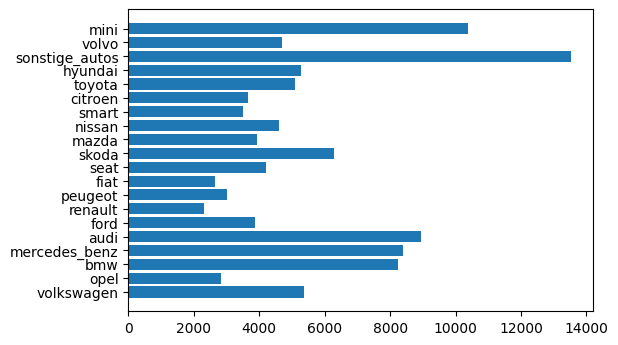

In [33]:
import matplotlib.pyplot as plt

names = list(mean_price.keys())
values = list(mean_price.values())

plt.barh(names, values)

plt.show()

In [34]:
mean_odometer_km = {}
for brand in top_20_auto_brands:
    mean_odometer_km[brand] = round(autos
                             .loc[autos['brand'] == brand, 'odometer_km']
                             .mean(), 2)

print(mean_odometer_km)

{'volkswagen': 131185.1, 'opel': 132110.88, 'bmw': 134817.18, 'mercedes_benz': 132717.04, 'audi': 130967.44, 'ford': 126458.09, 'renault': 130734.3, 'peugeot': 128540.22, 'fiat': 120184.89, 'seat': 123957.88, 'skoda': 113009.08, 'mazda': 127067.11, 'nissan': 121135.14, 'smart': 101443.97, 'citroen': 121374.82, 'toyota': 117262.3, 'hyundai': 107836.44, 'sonstige_autos': 101301.08, 'volvo': 139789.82, 'mini': 91204.82}


## 8. Store Aggregate Data in a Dataframe 

In [35]:
mean_price_series = pd.Series(mean_price)
mean_odometer_km_series = pd.Series(mean_odometer_km)

price_and_mileage_df = pd.DataFrame(
            mean_price_series,
            columns = [
                "mean_price"
            ]
        )

price_and_mileage_df['mileage_km'] = mean_odometer_km_series

In [37]:
price_and_mileage_df

,mean_price,mileage_km
volkswagen,5373.59,131185.10
opel,2829.89,132110.88
bmw,8253.86,134817.18
mercedes_benz,8379.87,132717.04
audi,8929.86,130967.44
ford,3862.74,126458.09
renault,2319.72,130734.30
peugeot,3014.55,128540.22
fiat,2663.41,120184.89
seat,4193.57,123957.88


There seems to be a negative relationship between the price a car has and its mileage. A bigger mileage is associated with lower price as is evident from the figure below

Text(0, 0.5, 'price')

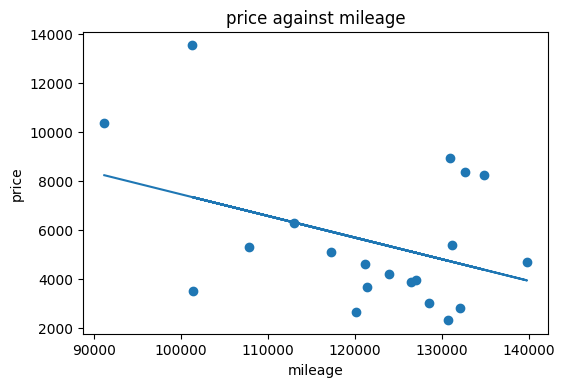

In [45]:
x = price_and_mileage_df['mileage_km']
y = price_and_mileage_df['mean_price']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.title("price against mileage")
plt.xlabel("mileage")
plt.ylabel("price")